## 1. Standard Import

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

## 2. Create a convolution instance

In [4]:
# create a conv2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 15  # 15 different Kernels are required to achive this
krnSize  = 5 # should be an odd number(5x5)
Stride   = 1
Padding  = 0

# create the instance (cf nn.Linear)
c = nn.Conv2d(in_channels=inChans,
              out_channels=outChans,
              kernel_size=krnSize,
              stride=Stride,
              padding=Padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor, what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
# 15 Kernels , therefore 15 biases one for each
print( 'Size of bias: ' + str(c.bias.shape) )

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


#### Plotting above kernels

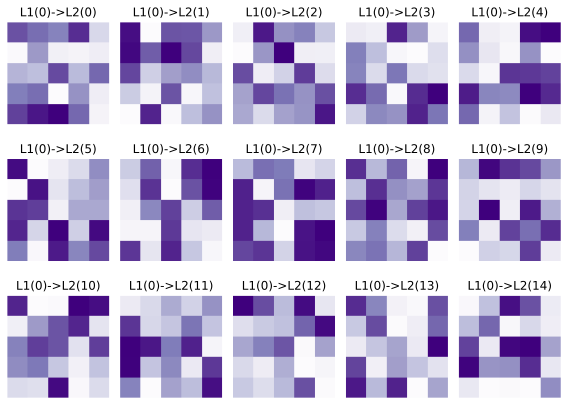

In [5]:
# What do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(8,6), dpi=135)

for i,ax in enumerate(axs.flatten()):
    
    ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
    ax.set_title(f'L1(0)->L2({i})')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3. Convolve with an Image

#### Creating a random image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


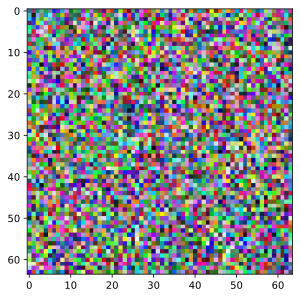

In [6]:
# size of the image (N, RGB, height, width)
imsize = (1,3,64,64)

img = torch.rand(imsize)

# pytorch wants channels first(RGB, height, width), but 
# matplotlib wants channels last(height, width,RGB).

# therefore, tensors must be permuted to visualize using matplotlib
# 2 : index number of height
# 3 : index number of width
# 1 : index number of RGB channel
# 0 : index number of batch size
img2view = img.permute(2,3,1,0).numpy()

print(img.shape)
print(img2view.shape)

# squeeze the singlton dimension
plt.imshow(np.squeeze(img2view));

In [7]:
# convolve the image with the filter bank (set of 'outChans' kernels)
# Applies a 2D convolution over an input signal composed of several input planes.
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


#### Visualizing the convolved images

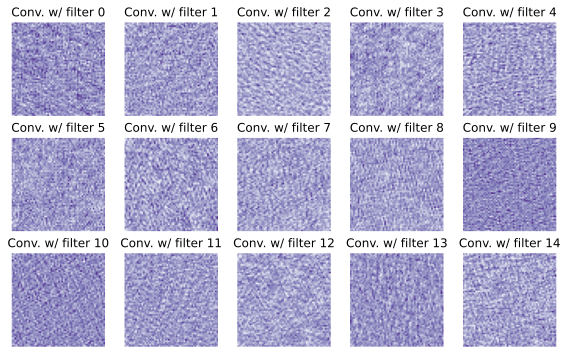

In [8]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,5,figsize=(8,5), dpi=135)

for i,ax in enumerate(axs.flatten()):

    # Extract this "layer" of the convolution result
    # 0 : indicating image (since we've' only one image therefore directly using 0 index number)
    I = torch.squeeze( convRes[0,i,:,:] ).detach()

    # visualize it
    ax.imshow(I,cmap='Purples')
    ax.set_title(f'Conv. w/ filter {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()